In [ ]:
!pip install geopandas

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install contextily

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
import contextily as ctx

**1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia**

In [ ]:
regioni = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf").to_crs(epsg = 3857)
regioni

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((940622.942 5854658.550, 941958.480 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((844755.963 5775663.263, 844893.962 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((981438.909 5625033.644, 981200..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((1358666.935 5956209.526, 1358841.301..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((1392151.013 5889736.446, 1392164.766..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((1533468.183 5718178.568, 15334..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((1096643.374 5469063.377, 10966..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((1166717.621 5494813.378, 11667..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((1237283.608 5199871.704, 12374..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((1383833.946 5402420.627, 13837..."


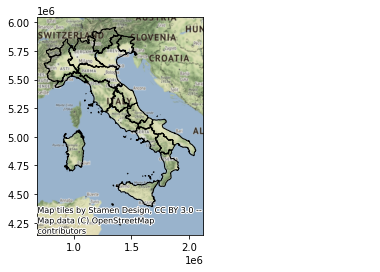

In [ ]:
ax = regioni = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf").to_crs(epsg = 3857).plot(edgecolor = 'k',color ='none')
ctx.add_basemap(ax)

**2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa**

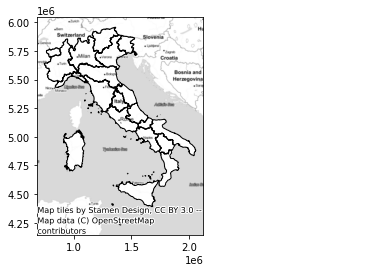

In [ ]:
ax = regioni = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf").to_crs(epsg = 3857).plot(edgecolor = 'k',color ='none')
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

**3. visualizzare le province della Lombardia su una mappa di contextily**

In [ ]:
ax = Prov = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g/ProvCM01012021_g_WGS84.dbf").to_crs(epsg = 3857)
Prov

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((874864.806 5716094.699, 875224.455 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((913316.880 5770047.041, 914339.417 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((945868.173 5754640.498, 946211.372 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((831185.838 5585837.915, 831553..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((895766.249 5641718.703, 895645.093 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((940622.942 5854658.550, 941958.480 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((1030143.619 5738854.212, 1030780.027..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((1529847.574 5356842.000, 1530755.170..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1776160.661 5077503.435, 1776374.788..."


In [ ]:
Lombardia = regioni[regioni.DEN_REG == 'Lombardia']
Lombardia

AttributeError: ignored

In [ ]:
Lombardia.geometry.squeeze()

In [ ]:
ProvLom = Prov[Prov.within(Lombardia.geometry.squeeze())]
ProvLom

In [ ]:
ProvLom = Prov[Prov.within(Lombardia.geometry.squeeze())]   #within necessita di un oggetto geometrico e per convertire un oggetto da geografico a geometrico si usa geometry.squeeze()
ProvLom.plot()

In [ ]:
ProvLom = Prov[Prov.within(Lombardia.geometry.squeeze())]   #within necessita di un oggetto geometrico e per convertire un oggetto da geografico a geometrico si usa geometry.squeeze()

ax = Prov[Prov.within(Lombardia.geometry.squeeze())].to_crs(epsg = 3857).plot()

ctx.add_basemap(ax)

**4. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti**

In [ ]:
Milano = ProvLom[ProvLom.DEN_CM == 'Milano']
Milano.plot()

In [ ]:
Comuni = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g/Com01012021_g_WGS84.dbf").to_crs(epsg = 3857)
Comuni

In [ ]:
Milano = Comuni[Comuni.COMUNE == 'Milano']
Milano

In [ ]:
ax = ProvLom[ProvLom.DEN_CM == 'Milano'].to_crs(epsg = 3857).to_crs(epsg = 3857).plot(edgecolor = 'k',color ='none')

Milano.plot(ax = ax)
ctx.add_basemap(ax)

**5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri.**

In [ ]:
Quartieri = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf").to_crs(epsg = 3857)
Quartieri

In [ ]:
ax = Quartieri_Milano = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf").to_crs(epsg = 3857).plot(edgecolor = 'k',color ='none')
ctx.add_basemap(ax)